This project is based on the Computational Fluid Dynamics Course by Prof. Lorena A. Barba. Most of the discretization steps coded for the solution of basic partial differential equations are followed from the same course and few basic plotting techniques are refined while solving convection, Burger's, Diffusion, Laplace and finally Navier-Stokes equation in both one dimension and two dimensions. And finally the analysis of what the results are showing us is presented at the end of each section. This project has helped me learn about numerical diffusion, convection and Navier Stokes equation, their accuracy and convergence and has helped me to develop the ability to understand basic fluid flow applying the appropriate boundary conditions. The core focus of this project was to develop python coding skills and understanding Numerical methods and discretization through the simulation of Physical Phenomena, here fluid flow.
<br>
<br>
Deepak Poudel
<br>
Aerospace Engineering
<br>
<br>
<br>

# Linear Convection <br>
The 1-D Linear Convection equation is the simplest and the most accessible equation in CFD; from
the Navier Stokes equation we kept only the accumulation and convection terms for the 
x-component of the velocity, to make things even simpler, the coefficient of the first derivative of 
the velocity is constant, making the equation linear. The equation is: 
        
$$ \frac{∂u}{∂t}+c\frac{∂u}{∂x}=0 $$<br>
With given initial conditions, this equation reperesents the propagation of that initial wave with
speed c, without change of shape. Let the initial condition be   $ u(x,0)= u_0(x).$ Then the exact solution of the equation is <br>
$$u(x,t) = u_0(x-ct).$$ <br>
Now, we discretize this equation in both space and time, using the forward Difference Scheme for the tume derivative and the Backward Differentiation Scheme for space derivative. Consider discretizing the spatial coordinate x into points that we index from $i=0$ to N, and Stepping in discrete time intervals of size $ \Delta{t}$. <br><p>
From the definition of a derivative, we know that: <br>
    $$\frac{\partial {u}}{\partial{x}} \approx \frac{u(x+\Delta{x})-(x)}{\Delta{x}}$$<Br>
    Then, our discrete equation is :<br>
  $$\frac{u_i^{n+1}-u_i^n}{\Delta{t}} +c\frac{u_i^n-u_{i-1}^n}{\Delta{x}}=0$$
    <br>
    where, $n$ and $n+1$ are two consecutive steps in time, while $i-1$ and $i$ are two neighbouring points of the discretized $x$ coordinate. If there are given initial conditions, then the only unknown in this discretization is $u_i^{n+1}$. We can solve for our unknown to get an equation that allows us to advance in time, as follows:
    $$u^{n+1}_i=u^n_i-c\frac{\Delta{t}}{\Delta{x}}(u^n_i−u^n_{i−1})$$ <br>
Now, this will be implemented in Python

In [1]:
import numpy as np
from matplotlib import pyplot
import time, sys 
%matplotlib inline

Now we will define few new variables; first we will define an evenly spaced grid of points within a spatial domain that is 4 units of length wide, i.e., $x_i∈(0,4)$. We'll define a variable nx, which will be the number of grid points we want and dx will be the distance between any pair of adjacent grid points.

In [2]:
nx = 50                  # number of gridpoints
dx=4/(nx-1)             # distance between adjacent pair of grid points
nt= 30                  # number of time steps we want to calculate
dt=.025                 # number of timesteps we want to calculate
c=1                     # assuming the wavespeed of c=1

Now, setting up the initial conditions.<br>
The initial velocity $u_0=4$ in the interval $0.5\le{x}\le{1}$ and $u=1$ everywhere else in (0,4) (i.e., a hat function).

In [4]:
u = np.ones(nx)
u[int(.5/dx):int(1/dx+1)]=4 # setting u=2 between 0.5 and 1 
print(u)

[1. 1. 1. 1. 1. 1. 4. 4. 4. 4. 4. 4. 4. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


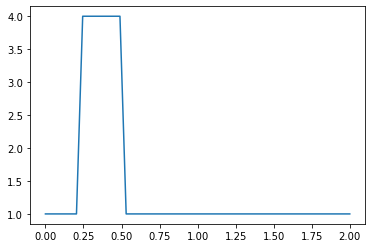

In [5]:
pyplot.plot(np.linspace(0,2,nx),u);   #plotting the hat function

Now, we will implement the discretization of the convection equation using a finite difference scheme.
For every element of our array u, we need to perform the operation<br>
$$ u_i^{n+1} = u_i^n - c\frac{Δt}{Δx}(u^n_i−u^n_{i−1})$$<p>
    We will store the result in a new array u_new, which will be the solution $u$ for the next time-step. We will repeate this operation for as many as many time-steps as we specify and then we can see how fat the wave has convicted. 
    </p><p>
    We first initialize our placeholder array u_new to hold the values we calculate from $n+1$ timestep, using once again the NumPy function ones().
    <br><p>
    Then, we will iterate through the u array using for loop
    
    

In [6]:
u_new =np.ones(nx)
for n in range (nt):
    u_new=u.copy()
    for i in range (1,nx):
        u[i]=u_new[i]-c*dt/dx*(u_new[i]-u_new[i-1])

Text(0.5, 1.0, 'Wave Profile after 30 iterations')

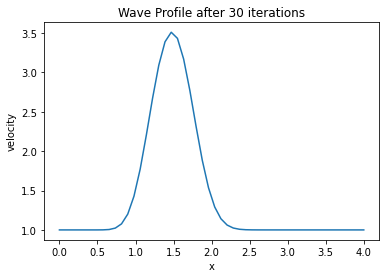

In [7]:
pyplot.plot(np.linspace(0,4,nx),u);
pyplot.ylabel('velocity')
pyplot.xlabel('x')
pyplot.title('Wave Profile after 30 iterations')


It is clear that the wave is travelling to the positive direction, with no change in shape; the height of the wave is changed untill the solution reaches convergence. <br>


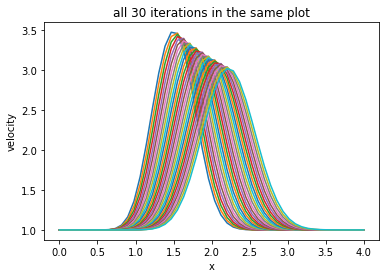

In [8]:
u_new =np.ones(nx)
for n in range (nt):
    u_new=u.copy()
    for i in range (1,nx):
        u[i]=u_new[i]-c*dt/dx*(u_new[i]-u_new[i-1])
    pyplot.plot(np.linspace(0,4,nx),u);
    pyplot.ylabel('velocity')
    pyplot.xlabel('x')
    pyplot.title('all 30 iterations in the same plot')

# Nonlinear Convection <br>
Now we will be implementing nonlinear convection using the same methods above. The one dimensional convection equation is: <br>
$$ \frac{∂u}{∂t}+u\frac{∂u}{∂x}=0 $$<br><p>
    Instead of a constant factor $c$ multiplying the second term, now we have the solution $u$ multiplying it. Thus, the second term of the equation is nonlinear now. We are going to use the same discretization as in above i.e. forward difference in time and backward difference in space. Here is the discretized equation.
      $$\frac{u_i^{n+1}-u_i^n}{\Delta{t}} +u_i^n\frac{u_i^n-u_{i-1}^n}{\Delta{x}}=0$$
    </p>
    Solving for the only wuknown term, $u_i^{n+1}$, yields:
    $$u^{n+1}_i=u^n_i-u_i^n\frac{\Delta{t}}{\Delta{x}}(u^n_i−u^n_{i−1})$$
    <br>
    After this we start by importing necessary python libraries, then we declare some variables that determine the discretization in space and time. Then we create initial condition $u_0$ by initializing the array for the solution using $u=2$ and  0.5≤x≤1 and u=1 everywhere else in (0,2), which is a hat function.
    

Text(0.5, 1.0, 'Wave Profile after 400 iterations')

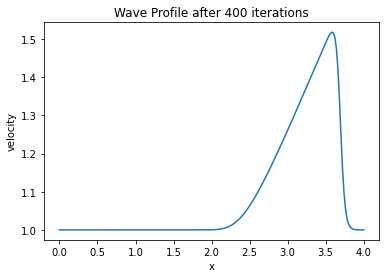

In [9]:

import pylab as pl
#pl.ion()

D = 4.0
T=2.0
nx=201
dx=D/(nx-1)
grid = np.linspace(0,D,nx)
nt=400
dt=T/nt
u=np.ones(nx)
u[int(0.5/dx):int(1/dx+1)]=2.0
un=np.ones(nx)
for n in range (nt):
    un = u.copy()
    for i in range (1,nx):
        u[i]=un[i]-un[i]*dt/dx*(un[i]-un[i-1])
pl.plot(grid,u);
pl.ylabel('velocity')
pl.xlabel('x')
pl.title('Wave Profile after 400 iterations')


In [10]:
import pylab as pl
pl.ion()
#
D = 4.0
T=2.0
nx=201
dx=D/(nx-1)
grid = np.linspace(0,D,nx)
nt=400
dt=T/nt
u=np.ones(nx)
u[int(0.5/dx):int(1/dx+1)]=2.0
un=np.ones(nx)
 

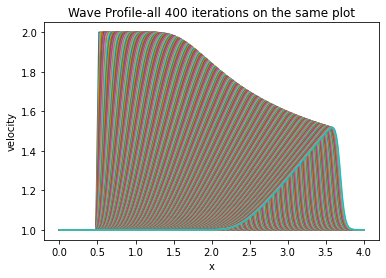

In [11]:
for n in range (nt):
    un = u.copy()
    for i in range (1,nx):
        u[i]=un[i]-un[i]*dt/dx*(un[i]-un[i-1])
    pl.plot(grid,u)
    pl.ylabel('velocity')
    pl.xlabel('x')
    pl.title('Wave Profile-all 400 iterations on the same plot')

Comparing the solution with that from the linear convection, the following obeservations can be made:<br>
The wave has moved to the right, with a change in shape. Similarly, the height is decreased which is similar to the linear. Increasing the total time will make the scheme unstable if there are not enough time steps i.e. if the time step is increased the problem loose resolution. If the size of the element, dx, is decreased, so should the time step and it should also be noted that the timestep should be less than half of the grid cell size.
<br><br><br><br><br><br><br>





# Diffusion Equation in 1-D<br>
The one-dimentional diffusion equation is:<br>
$$ \frac{∂u}{∂t}=v\frac{∂^2u}{∂x^2} $$<br>
It is different that two previous equations in the sense that it involves second order derivative while the above two don't.

<b> Discretizing </b> $\frac{\partial^2{u}}{\partial{x^2}}$<br>
    The Second Order Derivative can be represented geometrically as the line tangent to the curve given by the first derivative. We will discretize the second order dervative with a central difference scheme: a combination of Forward Difference and Backward Difference of the first derivative. Consider the taylor expansion of $u_{i+1}$ and $u_{i-1}$ around $u_i$:<br>
$$u_{i+1}=u_i+Δx{\frac{∂u}{∂x}}|_i+\frac{Δx^2}{2}{\frac{∂^2u}{∂x^2}}∣_i+\frac{Δx^3}{3!}\frac{∂^3u}{∂x^3}∣_i+O(Δx^4)$$
 
$$u_{i-1}=u_i-Δx{\frac{∂u}{∂x}}|_i+\frac{Δx^2}{2}{\frac{∂^2u}{∂x^2}}∣_i-\frac{Δx^3}{3!}\frac{∂^3u}{∂x^3}∣_i+O(Δx^4)$$ <br>
    If we add these two expressions,we can see that the odd numbered derivative terms will cancel eachother. If we neglect any terms of $O(Δx^4)$ or higher, then we can arrange the sum of these two expansions to solve for our second-derivative.<br>
    $$u_{i+1}+u_{i−1}=2u_i+Δx^2\frac{∂^2u}{∂x^2}∣_i+O(Δx^4)$$ <br>
    Rearranging and then solving for $\frac{∂^2u}{∂x^2}∣_i$, we get: <br>
    <p>
    $$\frac{∂^2u}{∂x^2}∣_i=\frac{u_{i+1}−2u_i+u_{i−1}}{Δx^2}+O(Δx^2)$$
   
 We can now write the discretized version of the diffusion equation in one dimension.<br>
   $$ \frac{u_i^{n+1}−u^n_i}{Δt}=ν \frac{u^n_{i+1}−2u^n_i+u^n_{i−1}}{Δx^2}$$

As before, we notice that we once we have an initial condition, the only unknown is$u^{n+1}_i$, so we re-arrange the equation solving for our unknown.
 $$ u^{n+1}_i=u^n_i+ν\frac{Δt}{Δx^2}(u^n_{i+1}−2u^n_i+u^n_{i−1}) $$

The above discrete equation allows us to write a program to advance a solution in time. But we need an initial condition.Let's continue using the hat function, so at t=0, u=2 in the interval $0.5≤x≤1 $and $u=1$ everywhere else.</n><br>
    <n> <br><b>Note:</b>
     Now here, we use only the diffusion term from the Navier-Stokes equation to determine the velocity. The difusion term is the second order derivative multiplied by the diffusive coefficient , which in this case is the viscosity.</n>

In [12]:
import numpy as np
import pylab as pl
pl.ion()
D=2.0
nx=41 
dx = D/(nx-1)
grid = np.linspace(0,D,nx)
nt=100        # number od timesteps we want to calculate (iterations)
nu=0.3     # the value of viscosity
sigma =0.2        # parameter, which is releated to Courant nu,ber
dt = sigma*dx**2/nu     # the duration of each time step
u = np.ones(nx)       # initializing the matrix for velocities
u[int(.5/dx) :int( 1/dx+1)] = 2 # input of initial conditions
 
   

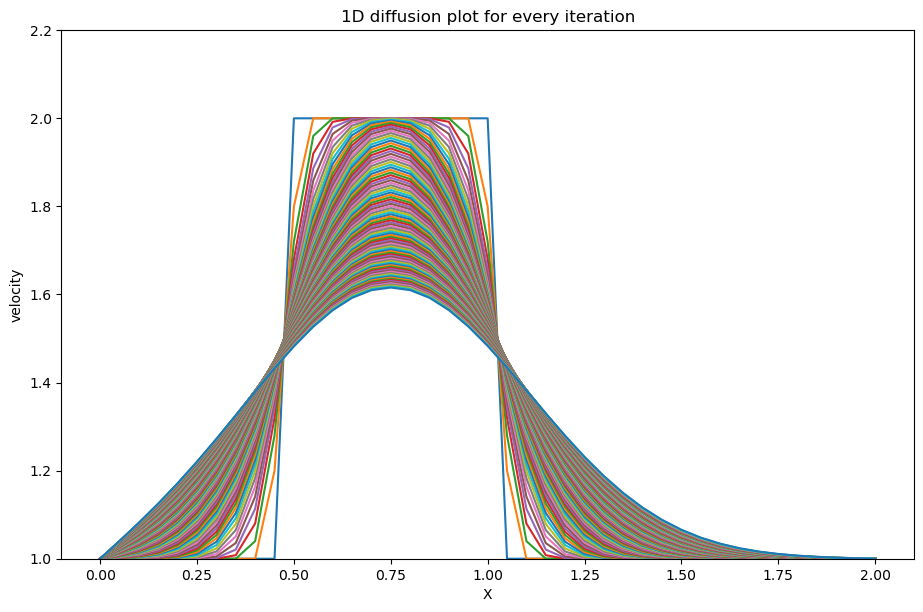

In [13]:
pl.figure(figsize = (11,7), dpi = 100)
pl.plot(grid, u)
u_new = np.ones(nx)          # placeholder for velocity of the current time step
for n in range (nt):     # loop for time iteration
    u_new = u.copy()       #copy the current values of velocity for each step 
    for i in range (1, nx-1):
        u[i]=u_new[i] + nu*dt/dx**2*(u_new[i+1] - 2*u_new[i] + u_new[i-1])
    pl.plot(grid,u)
    pl.ylim([1.,2.2])
    pl.xlabel('X')
    pl.ylabel('velocity')
    pl.title("1D diffusion plot for every iteration")

In [14]:
import numpy as np
import pylab as pl
pl.ion()
D=2.0
nx=41 
dx = D/(nx-1)
grid = np.linspace(0,D,nx)
nt=100        # number od timesteps we want to calculate (iterations)
nu=0.3     # the value of viscosity
sigma =0.2        # parameter, which is releated to Courant nu,ber
dt = sigma*dx**2/nu     # the duration of each time step
u = np.ones(nx)       # initializing the matrix for velocities
u[int(.5/dx) :int( 1/dx+1)] = 2 # input of initial conditions
 

Text(0.5, 1.0, '1D diffusion plot after final iteration')

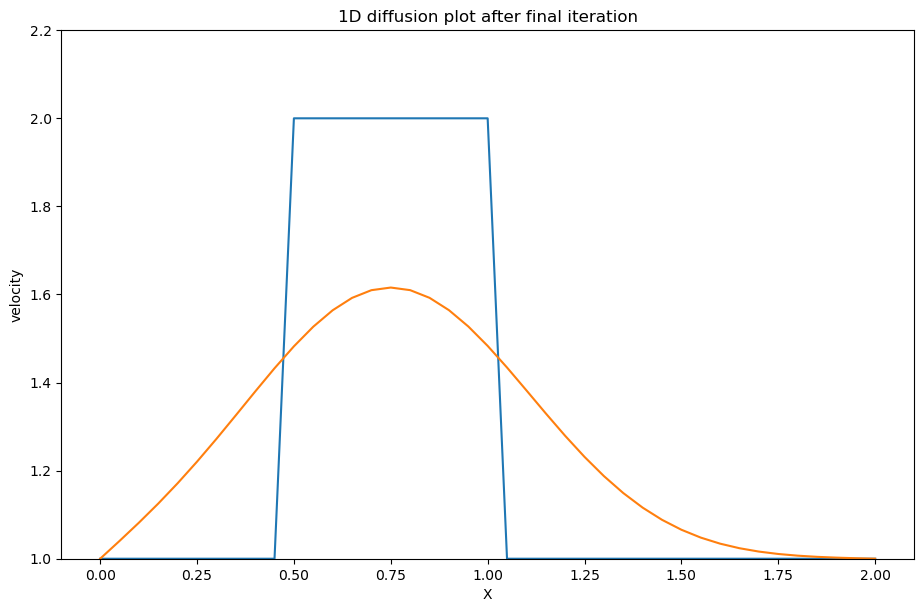

In [15]:
pl.figure(figsize = (11,7), dpi = 100)
pl.plot(grid, u)
u_new = np.ones(nx)          # placeholder for velocity of the current time step
for n in range (nt):     # loop for time iteration
    u_new = u.copy()       #copy the current values of velocity for each step 
    for i in range (1, nx-1):
        u[i]=u_new[i] + nu*dt/dx**2*(u_new[i+1] - 2*u_new[i] + u_new[i-1])
pl.plot(grid,u)
pl.ylim([1.,2.2])
pl.xlabel('X')
pl.ylabel('velocity')
pl.title("1D diffusion plot after final iteration")

<b> Discussion</b>
<br>
Blue graph in the figure represents the initial condition and the orange color represents the solution. As it can be seen that the wave is stationary and the amplitude is decaying, influencing the velocity of neighbouring cells.The physical reason for diffusion is the chaotic movement of the fluid particles. The Courant number is used here to calculate the time step. After running the program it can be seen that the wave does not move along the x axis, but the profile changes in a way that the velocitie between 0.5 and 1 are decreasing and the velocities in the vicinities are increasing. Given, the more time for diffusion, the velocities are reducing even more.

# Burger's Equation <br>
Burger's Equation in one spatial dimension is given as:<br>
$$\frac{∂u}{∂t}+u\frac{∂u}{∂x}=ν\frac{∂^2u}{∂x^2}$$
<br>
It is the combination of non-linear convection and diffusion. 
<n>
    We can discretize it using the methods we have already detailed above. Using forward difference for time, backward difference for space and our second order method for the second derivative yields: <br>
    $$\frac{u^{n+1}_i−u^n_i}{Δt}+u^n_i\frac{u^n_i−u^n_{i−1}}{Δx}=ν\frac{u^n_{i+1}−2u^n_i+u^n_{i−1}}{Δx^2}$$
    <br>
    After putting the initial conditions, the only unknown in the above equation will be $u^{n+1}_i$. And we will step in time as follows:
    <br>
    $$u^{n+1}_i=u^n_i−u^n_i\frac{Δt}{Δx}(u^n_i−u^n_{i−1})+ν\frac{Δt}{Δx^2}(u^n_{i+1}−2u^n_i+u^n_{i−1})$$
    <br>
    <b> Initial and Boundary Conditions</b><br>
    To examine some interesting properties of Burger's equation, it is helpful to use different initial and boundary conditions than we have been using for above steps. 
    <n>
       Our initial condition for this problem will be: <br>
        $$ u=−\frac{2ν}{ϕ}\frac{∂ϕ}{∂x}+4\qquad(1)$$<br>
       $$ϕ= exp(\frac{-x^2}{4ν})+exp(\frac{−(x−2π)^2}{4ν})\qquad(2)$$<br>
        This has an analytical solution, given by:<br>
         $$ u=−\frac{2ν}{ϕ}\frac{∂ϕ}{∂x}+4\qquad(3)$$<br>
        $$ϕ= exp(\frac{-(x-4t)^2}{4ν(t+1)})+exp(\frac{−(x−4t-2π)^2}{4ν(t+1)})\qquad(4)$$<br>
        Our boundary condition will be: <br>
        $$u(0)=u(2π)$$
        <br>
        This is called periodic boundary condition.

In [16]:
import sympy as sp
import numpy as np
import pylab as pl
pl.ion()

#Setting up symbolic variables
x,nu,t=sp.symbols('x nu t')
phi = (sp.exp(-(x - 4 * t)**2 /(4 * nu * (t + 1))) +sp.exp(-(x - 4 * t - 2 * sp.pi)**2 
                                                           / (4 * nu * (t + 1))))
phi
        

exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))

In [17]:
phiprime = phi.diff(x)
phiprime

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))

In [18]:
from sympy.utilities.lambdify import lambdify

u = -2 * nu * (phiprime / phi) + 4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


<b> Lambdify</b>
To lambdify this expression in to a usable function, we tell lambdify which variables to request and the function we want to plug them into.


In [19]:
ufunc = lambdify((t, x, nu), u) # transform the symbolic equation into a function using lambdify
print(ufunc(1, 4, 3))

3.49170664206445


In [20]:
# Variables declaration
nx = 101 # number of nodes in the domain
nt = 100 # number of time steps
dx = 2*np.pi/(nx-1) # dimension of one element/cell
nu = 0.07 # viscosity
dt = dx*nu # the timestep is defined based on the cell dimension
T = nt*dt # total time of the simulation

grid = np.linspace(0, 2*np.pi, nx) # generating the all grid points
un = np.empty(nx) # just for array creation
t = 0

# Initializing the velocity function
u = np.asarray([ufunc(t, x, nu) for x in grid])
#print u
u

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

Text(0.5, 1.0, '1D Burgers Equation- Initial Condition')

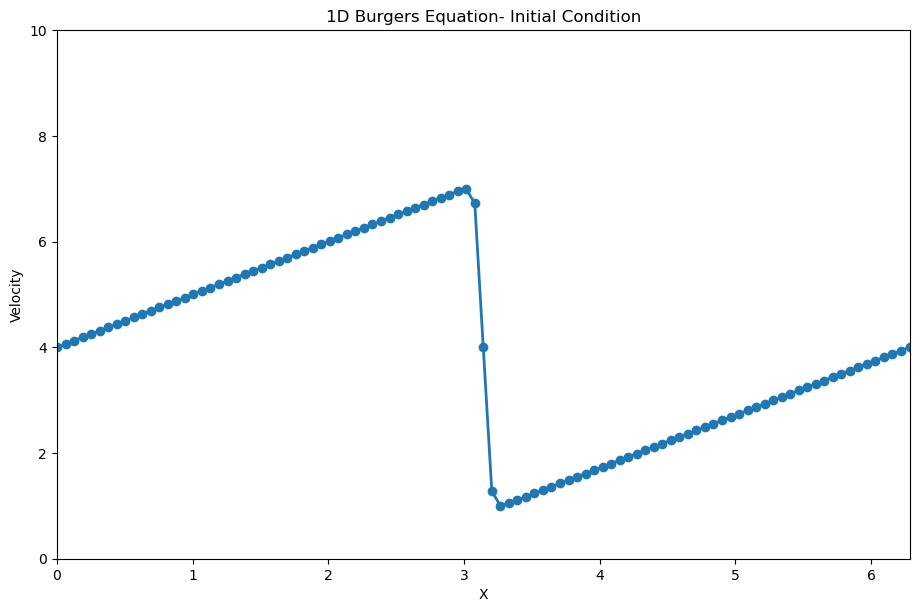

In [21]:
# Make a plot of the initial condition
pl.figure(figsize=(11,7),dpi=100);
pl.plot(grid,u,marker='o',lw=2)
pl.xlim([0,2*np.pi])
pl.ylim([0,10])
pl.xlabel('X')
pl.ylabel("Velocity")
pl.title('1D Burgers Equation- Initial Condition')

This is definately not the hat function we've been dealing with untill now. We call it a ''saw-tooth function'', where we can see the initial conditions.<br>
<p>
    <br>
<b> Periodic Boundary Conditions</b>
    <br>
<br>
And finally, the solution after 100 time steps; a comparison between the analytical and the numerical solution is done. The saw tooth function used as initial condition is basically a periodic wave profile; applying the scheme for convection and diffusion in time makes the profile move in the domain; a change in shape is observed both in the numerical and analytical solutions. <br>


Text(0.5, 1.0, '1D Burgers Equation - Solutions')

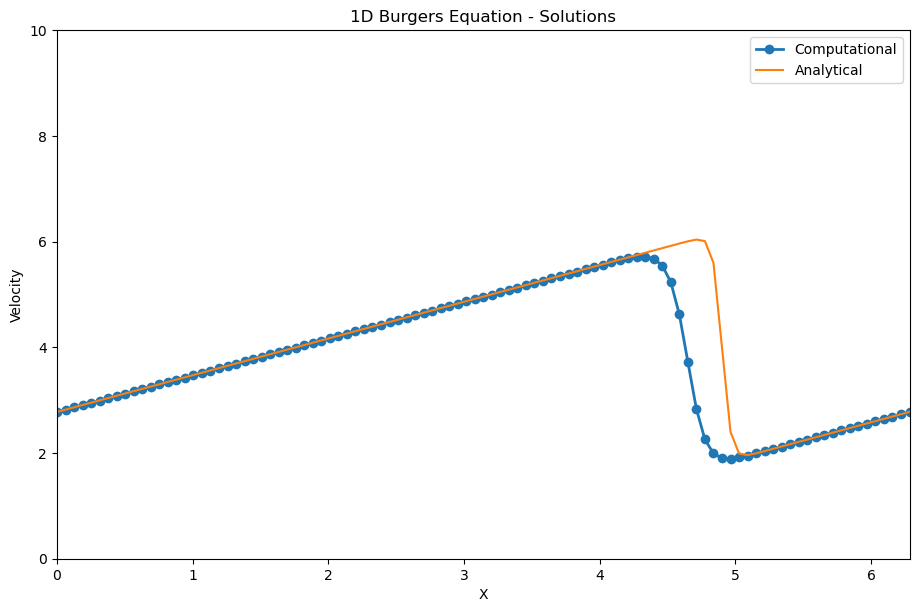

In [22]:
# Applying the scheme with periodic boundary conditions in mind 
for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 *\
                (un[i+1] - 2 * un[i] + un[i-1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 *\
                (un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]
        
u_analytic = np.asarray([ufunc(T, xi, nu) for xi in grid])
 
    
    
    #Make a plot in which both solutions are plotted
pl.figure(figsize=(11,7), dpi=100)
pl.plot(grid, u, marker='o', lw=2, label='Computational')
pl.plot(grid, u_analytic, label='Analytical')
pl.xlim([0, 2*np.pi])
pl.ylim([0,10])
pl.legend();
pl.xlabel('X')
pl.ylabel('Velocity') 
pl.title('1D Burgers Equation - Solutions')
        

Now we will extend the above steps in to 2D. To extend the 1D finite difference formulas to partial derivatives in 2D or 3D, just apply the definition: a partial derivative with respect to x in the variation in the x direction at constant y. <br>
In 2D space, a rectangular (uniform) grid is defined by the points with coordinates: <br>
$$x_i=x_0+iΔx$$
$$y_i=y_0+iΔy$$<br>
Now, define $u_{i,j}=u(x_i,y_j)$ and apply the finite-difference formulas on either variable $x,y$ acting separately on the<i> i</i> and <i>j</i> indices. All derivatives are based on the 2D Taylor expansion of a mesh point value around $u_{i,j}$. <br>
Hence, for a first-order partial derivative in the x-direction, a finite-difference formula is:<br>
$$\frac{∂u}{∂x}∣_{i,j}=\frac {u_{i+1,j}−u_{i,j}}{Δx}+O(Δx)$$
<br>
# Linear convection
<br>
The partial differential equation governing 2-D Linear Convection is written as: <br>
$$\frac{∂u}{∂t}+c\frac {∂u}{∂x}+c\frac{∂u}{∂y}=0$$ <br>
This is the exact same form as with 1-D Linear Convection, except that we now have two spatial dimensions to account for as we step forward in time.<br>
Again, the timesteps will be discretized as a forward difference and both spatial steps will be discretized as backward differences. <br>
With 1-D implementations, we used <i>i</i> subscripts to denote movement in space (e.g. $$u^n_i-u^n_{i-1}$$. Now that we have two dimensions to account for, we need to add a second subscript, <i>j</i>, to account for all the information in the regime.<br>
Here,we will again use <i>i</i> as the index for our <i>x</i> values, and we'll add the <i>j</i> subscript to track our <i>y</i> values. <br>
Now, our discretization of the PDE is given as : <br>
$$\frac{u^{n+1}_{i,j}−u^n_{i,j}}{Δt}+c\frac {u^n_{i,j}−u^n_{i−1,j}}{Δx}+c\frac{u^n_{i,j}−u^n_{i,j−1}}{Δy}=0 $$<br>
Now, we will solve for the only unknown <br>
$$u^{n+1}_{i,j}=u^n_{i,j}−c\frac{Δt}{Δx}(u^n_{i,j}−u^n_{i−1,j})−c\frac{Δt}{Δy}(u^n_{i,j}−u^n{i,j−1})$$<br>
The initital conditions are sm=imilar; the domain will be square of size 2; this will be divided in grid points; all points will be assigned with a starting velocity of 1, except for the points that have the x and y coordinates between 0.5 and 1; these will have an initial velocity of 2. Now we will work for representing the initial conditions with few lines of python code.

 

In [23]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
pl.ion()

# Variable declaration
nx = 81 # initial value 81
ny = 81 # initial value 81
nt = 100 # number of time steps; initial value 100
c = 1

dx = 2.0 / (nx-1)
dy = 2.0 / (ny-1)
sigma = 0.2
dt = sigma*dx

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((ny,nx)) # Create a 1xn vector of 1's
un = np.ones((ny,nx))

# Assign initial conditions
u[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2 # This is a 2D hat function

Text(0.5, 0.92, '2D Linear Convection: Initial condition')

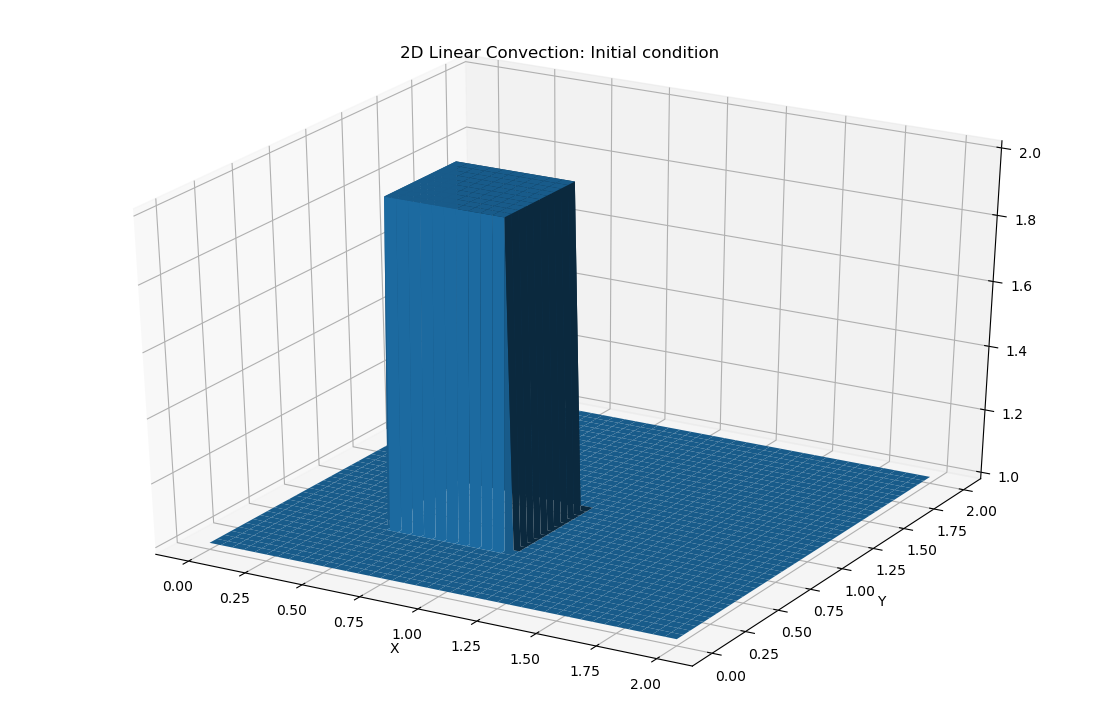

In [24]:
# Plot initial condition
fig = pl.figure(figsize = (11,7), dpi = 100)
ax = Axes3D(fig)
X, Y = np.meshgrid(x,y)
surf1 = ax.plot_surface(X,Y,u[:])
pl.xlabel('X')
pl.ylabel('Y')
pl.title('2D Linear Convection: Initial condition')

In [25]:
#iterating in two dimensions using nested for loop 
for n in range(nt+1): # loop across number of time steps
    un = u.copy()
    for i in range(1,len(u)):
        for j in range(1, len(u)):
            u[i,j] = un[i,j] - c*dt/dx*(un[i,j]-un[i-1,j]) - c*dt/dy*(un[i,j]-un[i,j-1])
            u[0,:] = 1
            u[-1,:] = 1
            u[:,0] = 1
            u[:,-1] = 1

Text(0.5, 0.92, '2D Linear Convection: Solution')

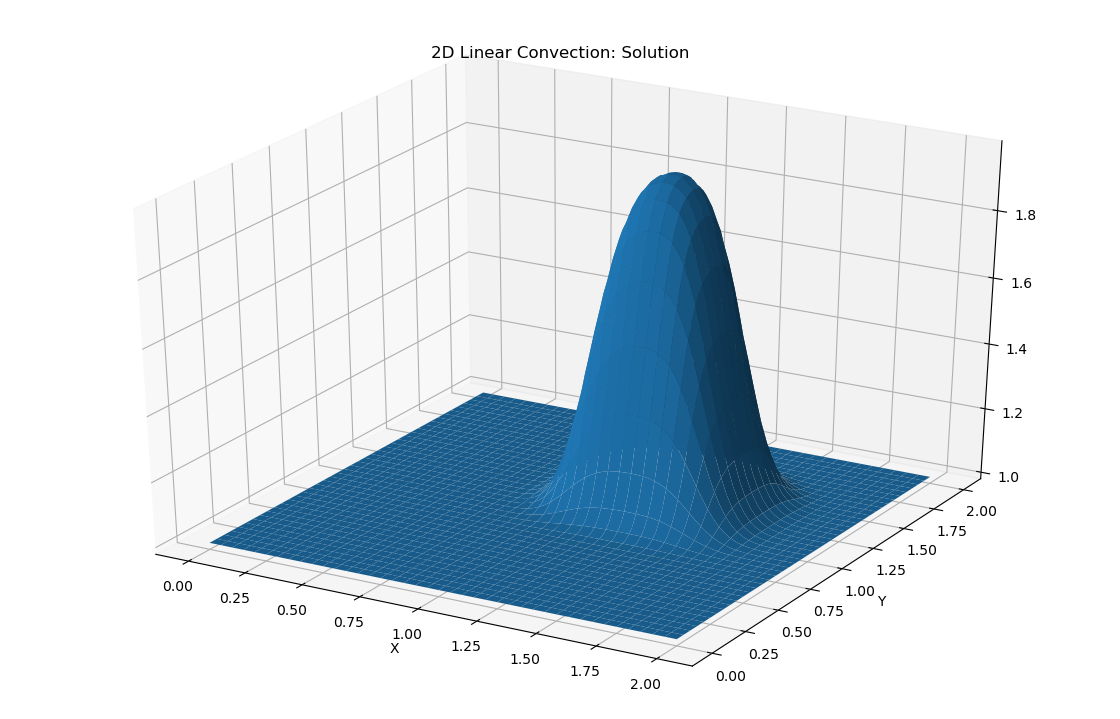

In [26]:
fig = pl.figure(figsize=(11,7), dpi=100)
ax = Axes3D(fig)
surf2 = ax.plot_surface(X, Y, u[:])
pl.xlabel('X')
pl.ylabel('Y')
pl.title('2D Linear Convection: Solution')

In [27]:
# iterating in two dimensions using array operations
for n in range(nt+1):
    un[:] = u[:]
    u[1:,1:] = un[1:,1:]-c*dt/dx*(un[1:,1:]-un[0:-1,1:])-c*dt/dy*(un[1:,1:]-un[1:,0:-1])
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0] = 1
    u[:,-1] = 1

Text(0.5, 0.92, '2D Linear Convection: Solution')

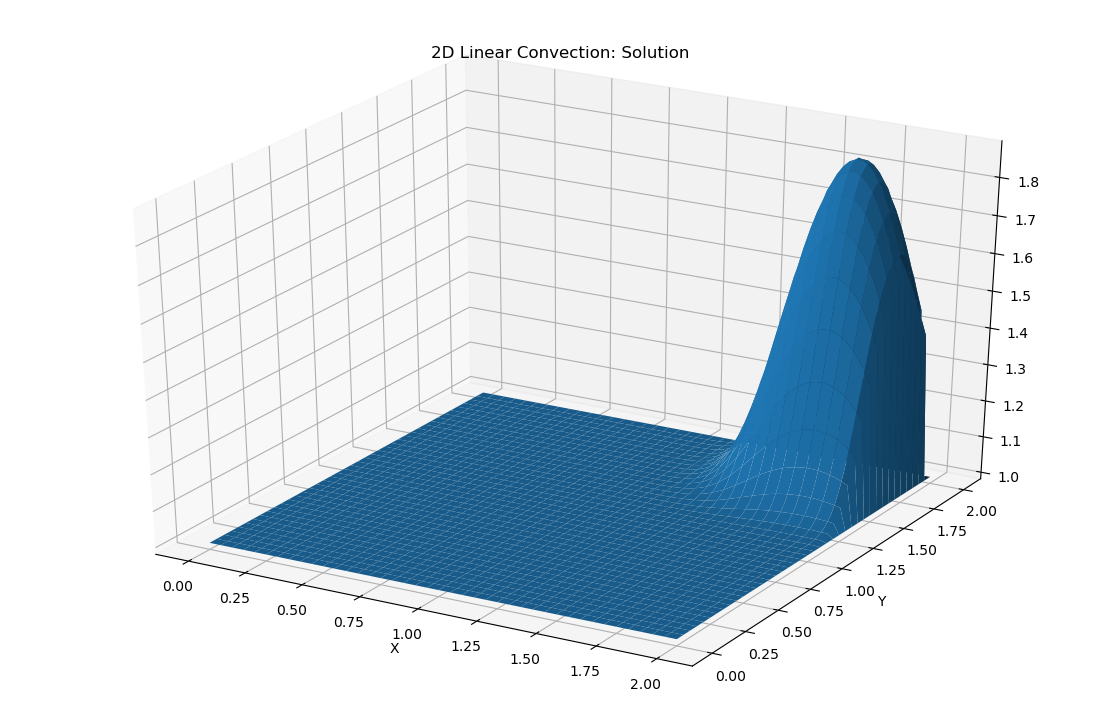

In [28]:
fig = pl.figure(figsize=(11,7), dpi=100)
ax = Axes3D(fig)
surf2 = ax.plot_surface(X, Y, u[:])
pl.xlabel('X')
pl.ylabel('Y')
pl.title('2D Linear Convection: Solution')

<b> Comments</b><br>
    The behavior is the same as for the 1D problem, the wave is moving without the change in shape of the profile. The difficulty of the problem lies in the coding of second dimension. 

# 2D non-linear convection <br>
Now, we solve the 2D COnvection, represented by the pair of coupled partial differential equations below: <br>
 $$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$ <br>$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$<br>
 Discretizing these equations using the finite difference method yields;<br>
 <p>
$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y} = 0$$
<br>
$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y} = 0$$ 
    </p>
    <p>
    
Rearranging both equations, we solve for $u_{i,j}^{n+1}$ and $v_{i,j}^{n+1}$, respectively, we will get;<br>
$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (u_{i,j}^n-u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n-u_{i,j-1}^n)$$
    <br>
    $$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (v_{i,j}^n-v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n-v_{i,j-1}^n)$$   
    </p>
    <p>
    <b>Initial Conditions</b><br>
The initial conditions are the same that we used for 1D convection, applied in both the x and y directions.<br>
<p>
$$u,\ v\ = \begin{cases}\begin{matrix}
 2 & \text{for } x,y \in (0.5, 1)\times(0.5,1) \cr
 1 & \text{everywhere else}
\end{matrix}\end{cases}$$
 </p>   

  
<b>Boundary Conditions</b><br>
The boundary conditions hold u and v equal to 1 along the boundaries of the grid.<br><p>

$$u = 1,\ v = 1 \text{ for } \begin{cases} \begin{matrix}x=0,2\cr y=0,2 \end{matrix}\end{cases}$$  

In [29]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
import numpy
%matplotlib inline

###variable declarations
nx = 101
ny = 101
nt = 80
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx)) ##create a 1xn vector of 1's
v = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))
vn = numpy.ones((ny, nx))

###Assign initial conditions
##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

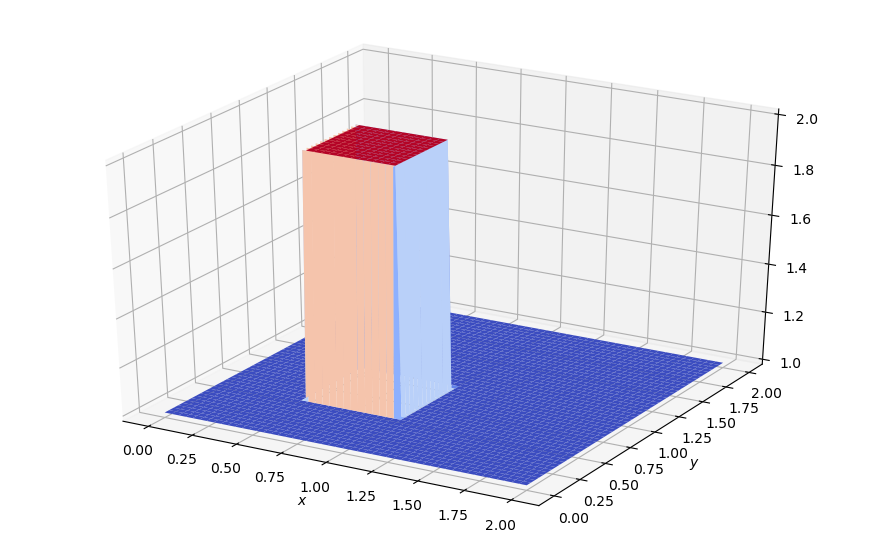

In [30]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.coolwarm, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [31]:
# Apply the scheme

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    vn = v.copy()
    u[1:, 1:] = (un[1:, 1:] - 
                 (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                  vn[1:, 1:] * c * dt / dy * (un[1:, 1:] - un[:-1, 1:]))
    v[1:, 1:] = (vn[1:, 1:] -
                 (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - vn[1:, :-1])) -
                 vn[1:, 1:] * c * dt / dy * (vn[1:, 1:] - vn[:-1, 1:]))
    
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1
 

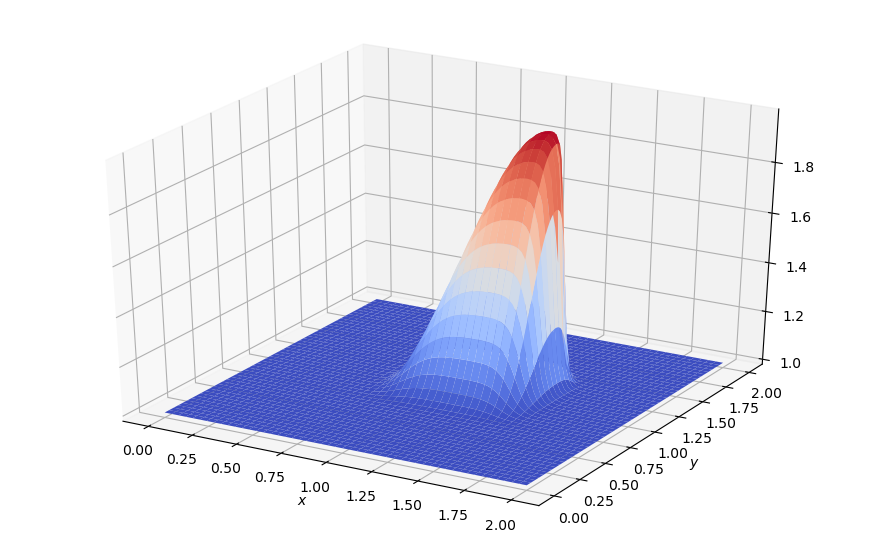

In [32]:

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.coolwarm, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

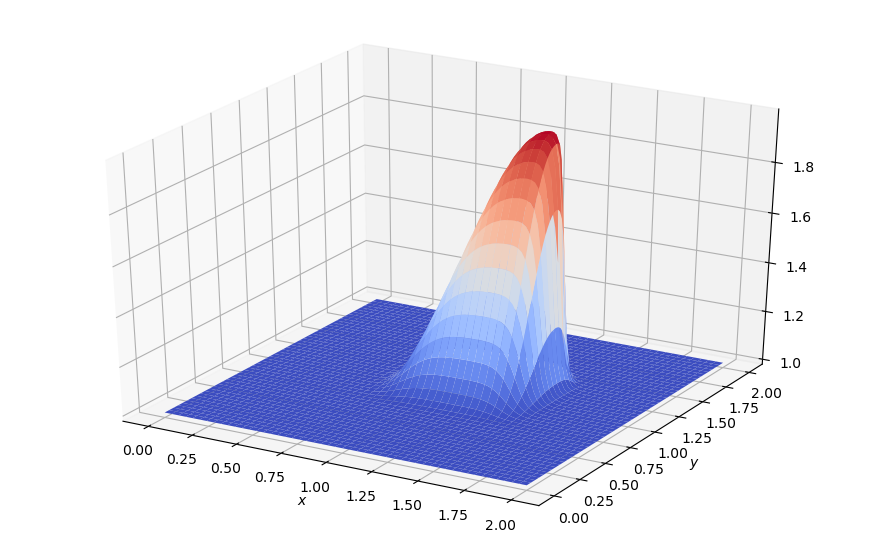

In [33]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, v, cmap=cm.coolwarm, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

<b>Comments</b><br>
The plot is created using a color-map named coolwarm and this is used to show the high values of velocity.The solution shows a change in the wave profile that appears as the wave travels through the domain. In reality this deformation creates a brake at the crest of the wave. Thus the non-linear convection creates a non-uniform transform of the properties in the fluid domain.

# 2D Diffusion<br>
The 2D diffusion equation is: <br>

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$<br>
Now we will extend our analysis form one dimensional diffusion to two dimensional diffusion. Before, we came up with the method of discretizing second order derivatives. We are going to use the same scheme here, with our forward difference in time and two second order derivatives.<br>
<p>
    
$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \nu \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}$$
    <br>
    Once again, we reorganize the discretized equation and solve for $u_{i,j}^{n+1}$ <br>

$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^n &+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) \\
&+ \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$
</p>
The scheme will be implemented as a function to be called with different values of iteration. The python code is given below:

In [34]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D ##library for 3d projection plots
%matplotlib inline 

In [35]:
 ###variable declarations
nx = 31
ny = 31
nt = 17
nu = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))  # create a 1xn vector of 1's
un = numpy.ones((ny, nx))

###Assign initial conditions
# set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

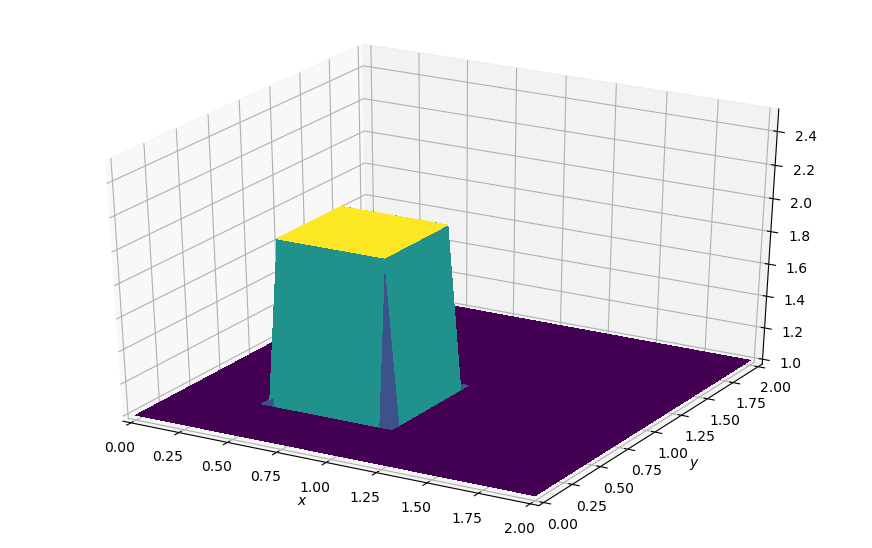

In [36]:
 # Plot the initial conditions
 
fig= pyplot.figure(figsize=(11,7), dpi = 100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [37]:
# Applying the scheme in a function of time
def diffuse(nt):
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  
    
    for n in range(nt + 1): 
        un = u.copy()
        u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                        nu * dt / dx**2 * 
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        nu * dt / dy**2 * 
                        (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1

    
    fig = pyplot.figure(figsize = (11,7), dpi = 100)
    ax = fig.gca(projection='3d');
    surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=True)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$'); 
    ax.set_title('2D Diffusion only: Solution after '+ str(nt) + ' steps')

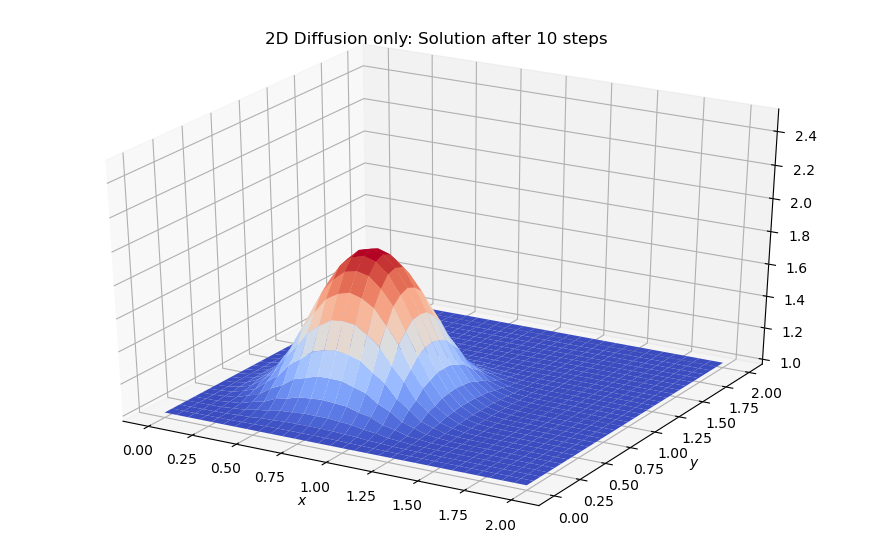

In [38]:
    
diffuse(10)

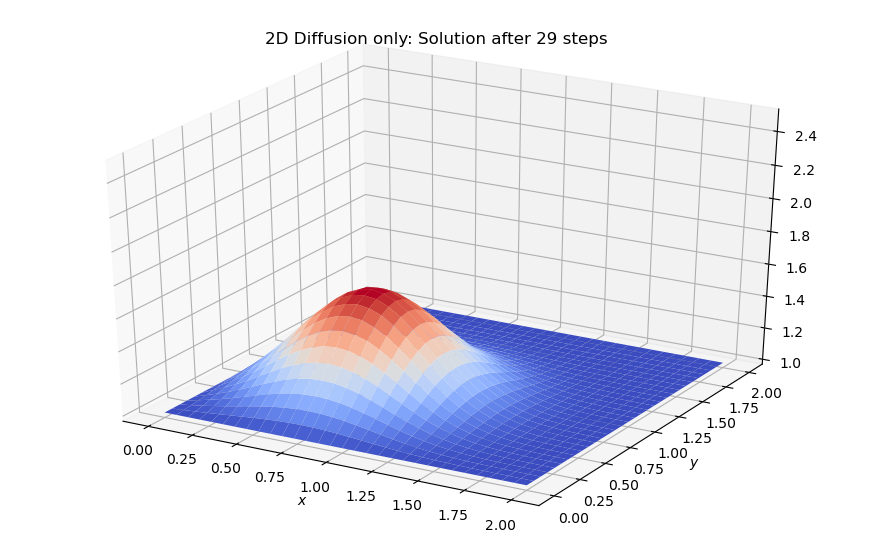

In [39]:
diffuse(29)

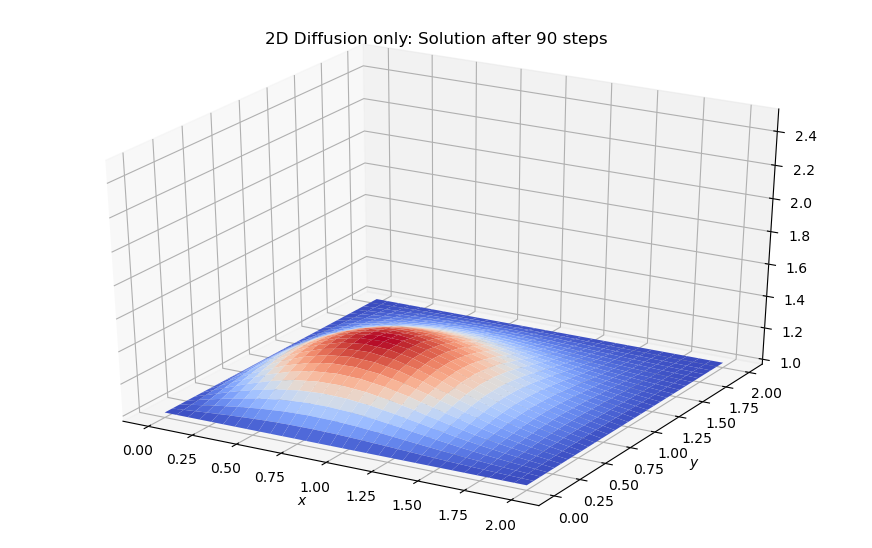

In [40]:
diffuse(90)

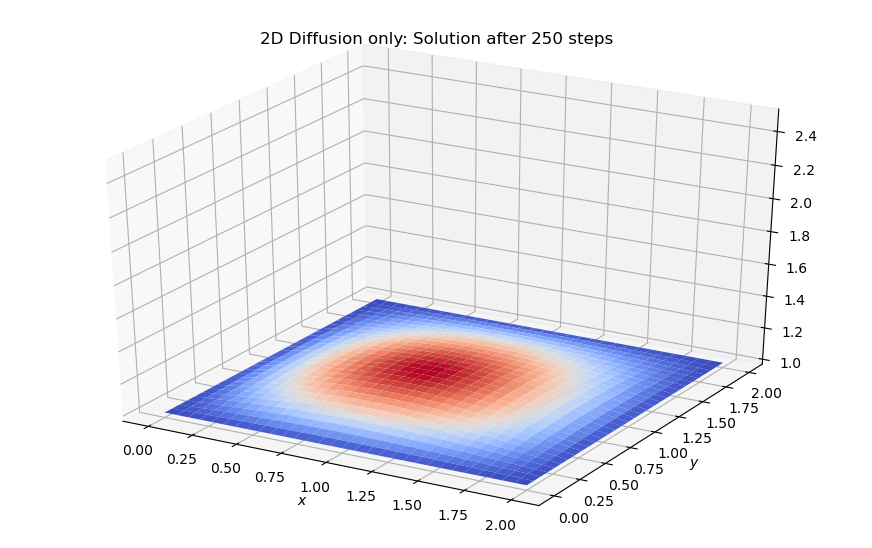

In [41]:
diffuse(250)

<b> Comment </b><br>
The solution is plotted for various steps in order to see the evolution of the phenomena with the elapse in time. It clearly shows that is the concentration of species is initially not uniform, then, over time, diffusion causes the mass transfer in favour of a more uniform concentration. How fast is the diffusion is determined by the only parameter; the diffusion coefficient(Flick's laws)

# Burger's Equation in 2D
<br>
The Burgers' equation sums up non linear convection and the diffusion equation, still being not very complicated, some analytical solutions exist and the numerical solutions can be validated easily. The set of equations to be solved is the following:<br>
$$\frac{∂u}{∂t}+u\frac{∂u}{∂x}+v\frac{∂u}{∂y}=ν\left(\frac{∂^2u}{∂x^2}+\frac{∂^2u}{∂y^2}\right)$$
<br>
$$\frac{∂v}{∂t}+u\frac{∂v}{∂x}+v\frac{∂v}{∂y}=ν\left(\frac{∂^2v}{∂x^2}+\frac{∂^2v}{∂y^2}\right)$$
<br>
Now, discretizing each term as before, we get:<br>
<br>
$$\frac{u^{n+1}_{i,j}−u^n_{i,j}}{Δt}+u^n_{i,j}\frac{u^n_{i,j}−u^n_{i−1,j}}{Δx}+v^n_{i,j}\frac{u^n_{i,j}−u^n_{i,j−1}}{Δy}=ν\left(\frac{u^n_{i+1,j}−2u^n_{i,j}+u^n_{i−1,j}}{Δx^2}+\frac{u^n_{i,j+1}−2u^n_{i,j}+u^n_{i,j−1}}{Δy^2}\right)$$
<br>
<br>
$$\frac{v_{i,j}^{n+1} - v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n - v_{i,j-1}^n}{\Delta y} = v\left( \frac{v_{i+1,j}^n - 2v_{i,j}^n+v_{i-1,j}^n}{\Delta x^2} + \frac{v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n}{\Delta y^2} \right)$$
<br>
<br>
And rearranging the above equations for finding the scheme to be implemented in python:<br><br>

$$v_{i,j}^{n+1} = v_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (v_{i,j}^n - v_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (v_{i,j}^n - v_{i,j-1}^n)+ \frac{\nu \Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n)$$
<br>
<br>

 

In [42]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
pl.ion()

In [43]:

nx = 51
ny = 51
nt = 1200
dx = 2.0/(nx-1)
dy = 2.0/(ny-1)
sigma = 0.0009
nu = 0.005
dt = sigma*dx*dy/nu
x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

In [44]:
u = np.ones((ny,nx))
v = np.ones((ny,nx))
un = np.ones((ny,nx))
vn = np.ones((ny,nx))
#assigning the initial conditions
u[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2                    
v[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2


(1.0, 2.0)

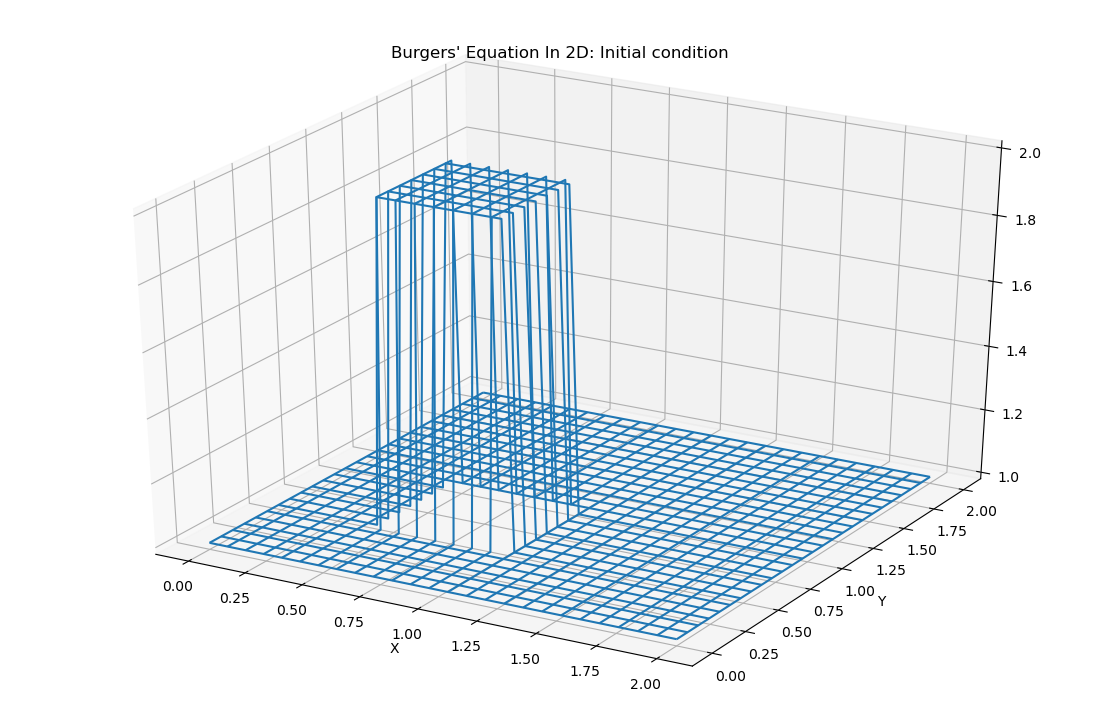

In [45]:
# Plotting the initial condition
fig  = pl.figure(figsize = (11,7), dpi = 100)
ax = Axes3D(fig)
X, Y = np.meshgrid(x,y)
ax.plot_wireframe(X, Y, u[:])
pl.xlabel('X')
pl.ylabel('Y')
ax.set_zlim(1,2.0)
pl.title("Burgers' Equation In 2D: Initial condition")
ax.set_zlim(1,2.0)

In [46]:
def plotsteps(number):
    for n in range(number+1):
        un = u.copy()
        vn = v.copy()

        u[1:-1,1:-1] = un[1:-1,1:-1] - dt/dx*un[1:-1,1:-1]*(un[1:-1,1:-1]-un[0:-2,1:-1]) - \
        dt/dy*vn[1:-1,1:-1]*(un[1:-1,1:-1]-un[1:-1,0:-2]) + nu*dt/dx**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1]) + \
        nu*dt/dy**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2])

        v[1:-1,1:-1] = vn[1:-1,1:-1] - dt/dx*un[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[0:-2,1:-1]) - \
        dt/dy*vn[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[1:-1,0:-2]) + nu*dt/dx**2*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1]) + \
        nu*dt/dy**2*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2])

        u[0,:] = 1
        u[-1,:] = 1
        u[:,0] = 1
        u[:,-1] = 1

        v[0,:] = 1
        v[-1,:] = 1
        v[:,0] = 1 
        v[:,-1] = 1
    fig = pl.figure(figsize = (11,7), dpi = 100)
    ax = Axes3D(fig)
    X, Y = np.meshgrid(x,y)
    ax.plot_wireframe(X,Y,u[:])
    pl.xlabel('X')
    pl.ylabel('Y')
    pl.title("Burgers' Equation: Solution after" +"str(number)" + "steps")
    ax.set_zlim(1,2.0)
 

The evolution of the solution after different time steps is shown below:

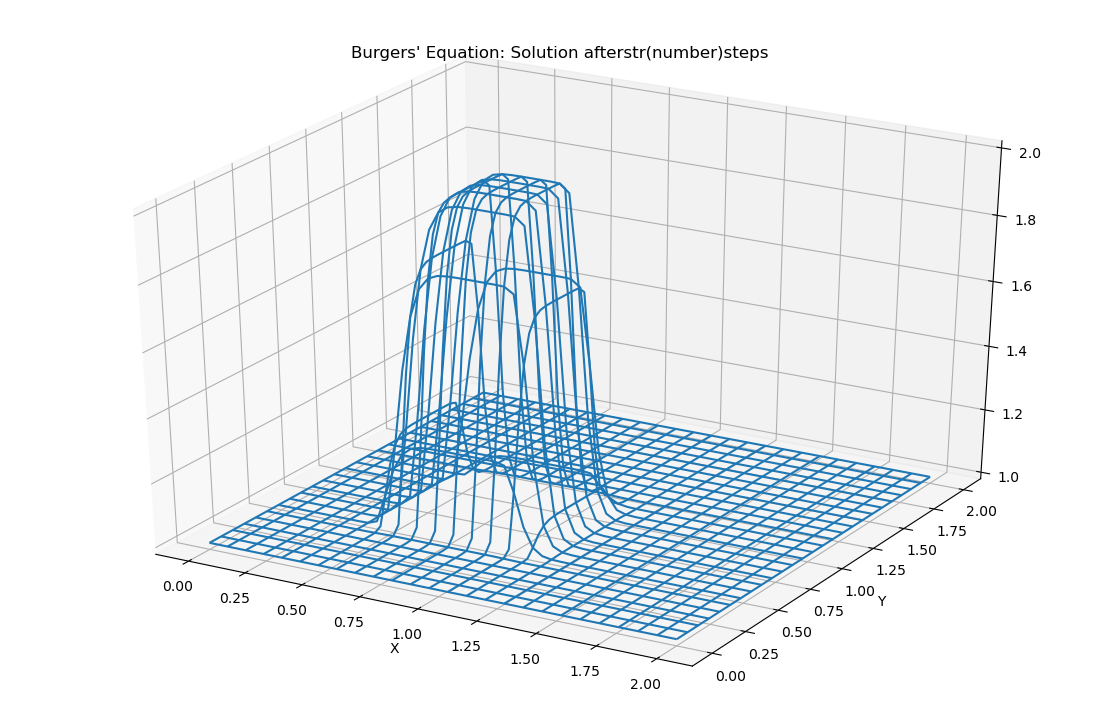

In [47]:
 plotsteps(120)

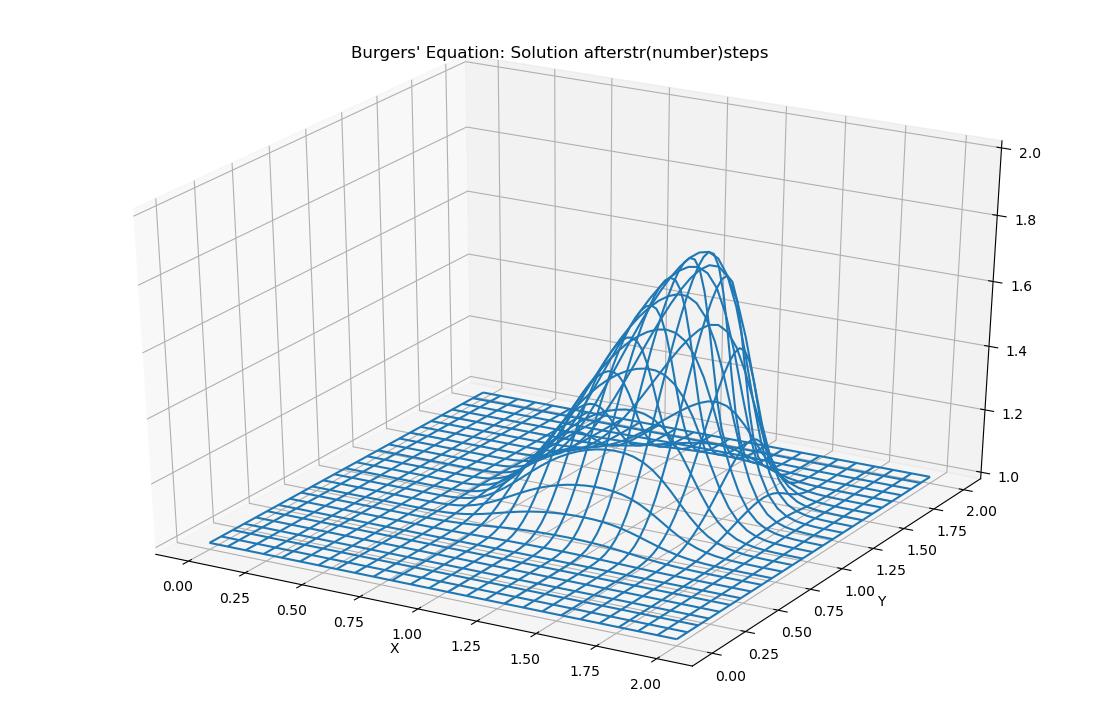

In [48]:
plotsteps(1200)

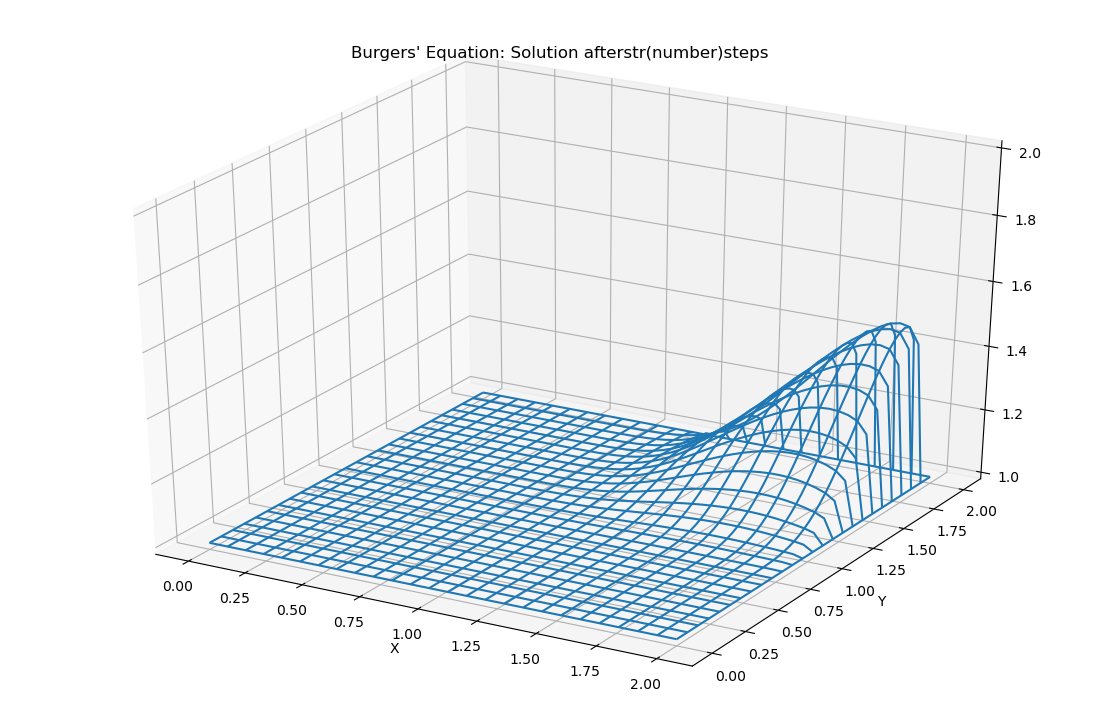

In [49]:
plotsteps(1500)

The discussion from previous steps apply: the wave profile is affected both by the convection and diffusion. The convection makes the wave to be carried with the flow and deforms it, creating crest. The diffusion makes the momentum spread in the domain and reduces the magnitude of the wave.

# 2D Laplace Equation<br>
Laplace equation is a 2D second order differential equation and appears in Navier Stokes in the diffusion term. It also appears in the third equation if the 2D incompressible Navier Stokes which is used to couple between pressure and velocity. The equation is given as: <br><br>
$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = 0$$
<br><br>
Laplace equation has the feature typical of diffusion phenomena. For this reason, it has to be discretized with central differences, so that the discretization is consistent with the physics we want to simulate. <br><br>
The discretized equation is: <br>
$$\frac{p_{i+1, j}^n - 2p_{i,j}^n + p_{i-1,j}^n}{\Delta x^2} + \frac{p_{i,j+1}^n - 2p_{i,j}^n + p_{i, j-1}^n}{\Delta y^2} = 0$$
<br>
<br>
This equation is little different from diffusion only in that there is no time derivative, therefore this equation will give an equilibrium for given boundary conditions. Of course, equilibrium will be reached after many iterations but the convergence criterion can be used to stop the solver.<br><br>
Rearranging the discretized equation and solving for $p^n_{i,j}$
<br>
<br>
$$p_{i,j}^n = \frac{\Delta y^2(p_{i+1,j}^n+p_{i-1,j}^n)+\Delta x^2(p_{i,j+1}^n + p_{i,j-1}^n)}{2(\Delta x^2 + \Delta y^2)}$$
<br>
<br>
Using second-order central-difference schemes in both directions is the most widely applied method for the Laplace operator. It is also known as the five-point difference operator.
<br>
<br>
We are going to solve Laplace's equation numerically by assuming an initial state of $p=0$ everywhere. Then we add boundary conditions as follows:<br>
$p=0$ at $x=0$
<br>
$p=y$ at $x=0$
<br>
$\frac{\partial p}{\partial y}=0$ at $y=0,1$
<br>
Using these conditions, there is an analytical solution for Laplace's equation:<br>
<br>
$$p(x,y)=\frac{x}{4}-4\sum_{n=1,odd}^{\infty}\frac{1}{(n\pi)^2\sinh2n\pi}\sinh n\pi x\cos n\pi y$$


In [50]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [51]:
def plot2D(x, y, p):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.coolwarm,
            linewidth=0, antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

The plot2D takes three arguments, an x-vector, a y-vector and our p matrix. Given these three values, it produces a 3D projection plot, sets the plot limits and gives us a nice viewing angle.
<br>
<br>
$$p_{i,j}^n = \frac{\Delta y^2(p_{i+1,j}^n+p_{i-1,j}^n)+\Delta x^2(p_{i,j+1}^n + p_{i,j-1}^n)}{2(\Delta x^2 + \Delta y^2)}$$
<br>


In [52]:
def laplace2d(p, y, dx, dy, l1norm_target):
    l1norm = 1
    pn = numpy.empty_like(p)

    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                         dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) /
                        (2 * (dx**2 + dy**2)))
            
        p[:, 0] = 0  # p = 0 @ x = 0
        p[:, -1] = y  # p = y @ x = 2
        p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
        p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1
        l1norm = (numpy.sum(numpy.abs(p[:]) - numpy.abs(pn[:])) /
                numpy.sum(numpy.abs(pn[:])))
     
    return p

<b>laplace2d</b> takes five arguments, the <b>p</b> matrix, the <b>y-vector</b>, <b>dx</b>, <b>dy</b> and the value <b>l1norm-target</b>. This last value defines how close the <b>p</b> matrix should be in two consecutive iterations before the loop breaks and returns the calculated <b>p</b> value. 
<br>


In [53]:
##variable declarations
nx = 31
ny = 31
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)


##initial conditions
p = numpy.zeros((ny, nx))  # create a XxY vector of 0's


##plotting grids
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 1, ny)

##boundary conditions
p[:, 0] = 0  # p = 0 @ x = 0
p[:, -1] = y  # p = y @ x = 2
p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1

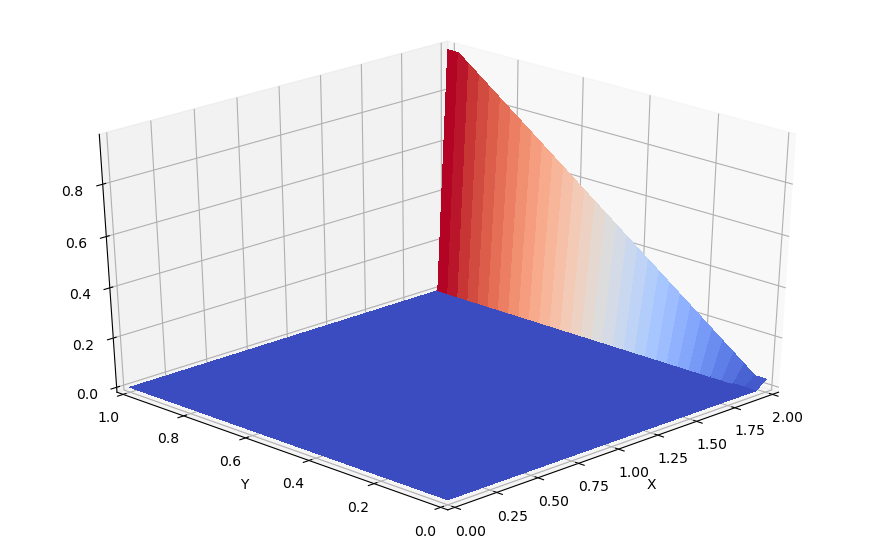

In [54]:
plot2D(x,y,p)

This is the initial state of our problem, where the value of $p$ is zero everywhere except for along $x=2$ where $p=y$. Now let's try to run our $laplace2d$ function with a specified L1 target of .01


In [55]:
p = laplace2d(p,y,dx,dy,1e-4)

Now, we try plotting the new value of $p$ with the plot

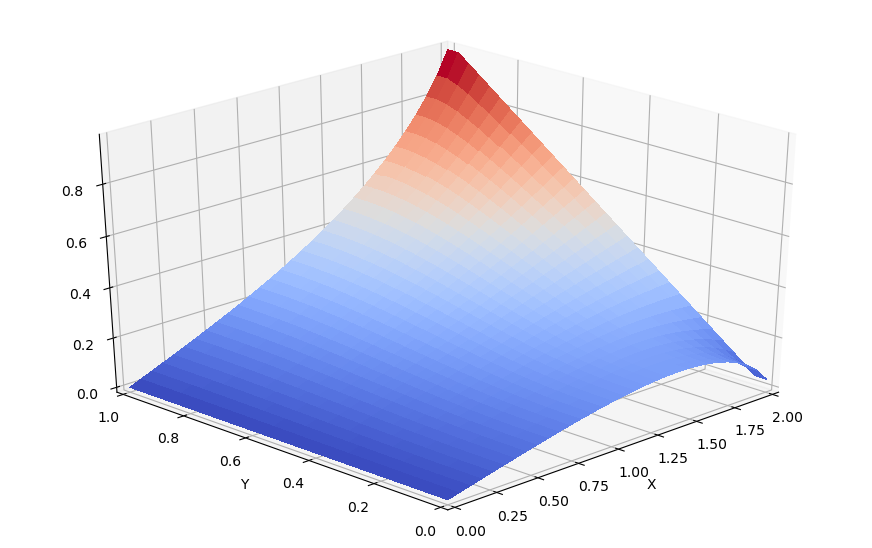

In [56]:
plot2D(x,y,p)

As it was expected, the boundary conditions are kept as defined.

# 2D Poisson Equation<br>
<br>
Recalling the Navier-Stokes equations for an incompressible fluid, where $\vec{v}$ represents the velocity field:
<br>
<br>
\begin{eqnarray*}
\nabla \cdot\vec{v} &=& 0 \\
\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\nabla)\vec{v} &=& -\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{v}
\end{eqnarray*}
<br>
<br>
To better understand Poisson Equation, we must return to Navier-Stokes equations, for a incompressible fluid we must resolve the continuity and the momentum equations, the continuity equation creates a kinematic constraint which implies that $\nabla \cdot\vec{v}=0$ in the domain and is not coupled with the pressure, i.e. why we cannot use the continuity directly in the development of a solving procedure. 


Poission's equation can be obtained from adding a source term to the right hand side of Laplace's equation. <br>
<br>
$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = b$$
<br>
<br>
So, unlike the laplace equation, there is some finite value inside the field that affects the solution. Poission's equation acts to relax the initial sources in the field. 
<br>
It's discretized form is: <br>
$$\frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2 p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2}=b_{i,j}^{n}$$
<br>
<br>
Rearranging, we get: <br><br>
$$p_{i,j}^{n}=\frac{(p_{i+1,j}^{n}+p_{i-1,j}^{n})\Delta y^2+(p_{i,j+1}^{n}+p_{i,j-1}^{n})\Delta x^2-b_{i,j}^{n}\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}$$
<br>
<br>
We will solve this equation by assuming an initial state of $p=0$ everywhere, and applying boundary conditions as follows:
<br>

$p=0$ at $x=0, 2$ and $y=0, 1$
<br>
and the source term consists of two initial spikes inside the domain, as follows:
<br>
<br>
$b_{i,j}=100$ at $i=\frac{1}{4}nx, j=\frac{1}{4}ny$
<br>
$b_{i,j}=-100$ at $i=\frac{3}{4}nx, j=\frac{3}{4}ny$
<br>
$b_{i,j}= 0 $ everywhere
<br>


In [ ]:
import numpy as np
import pylab as pl
from pylab import cm
from mpl_toolkits.mplot3d import Axes3D
pl.ion()

In [57]:
# Variable declaration
nx = 100
ny = 100
nt = 1000

xmin = 0.0
xmax = 2.0
ymin = 0.0
ymax = 1.0

dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)
# Initializing all matrices
p = np.zeros((nx,ny))
pn = np.zeros((nx,ny))
b = np.zeros((nx,ny))

x = np.linspace(xmin,xmax,nx)
y = np.linspace(ymin,ymax,ny)

# Defining the source
b[int(nx/4),int(ny/4)] = -100
b[int(3*nx/4),int(3*ny/4)] = -100
#b[nx/4,3*ny/4] = -80
#b[3*nx/4,ny/4] = -99


In [58]:
# applying the scheme same as the previous step
for n in range(nt):
    pn = p.copy()
    p[1:-1,1:-1] = (dx**2*(pn[1:-1,0:-2] + pn[1:-1,2:]) + \
    dy**2*(pn[0:-2,1:-1] + pn[2:,1:-1]) - 
    b[1:-1,1:-1]*dx**2*dy**2)/(2*dx**2+2*dy**2)
    
    p[0,:] = p[-1,:] = p[:,0] = p[:,-1] = 0.0
    
#function for plotting
def plot2D(x, y, p):
    fig = pl.figure(figsize = (11,7), dpi = 100)
    ax = Axes3D(fig)
    X, Y = np.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.coolwarm, 
            linewidth=0, antialiased=True)
    ax.set_xlim(0,2)
    ax.set_ylim(0,1)
    ax.set_zlim(-0.015,0.015)    
    #ax.view_init(30,225)

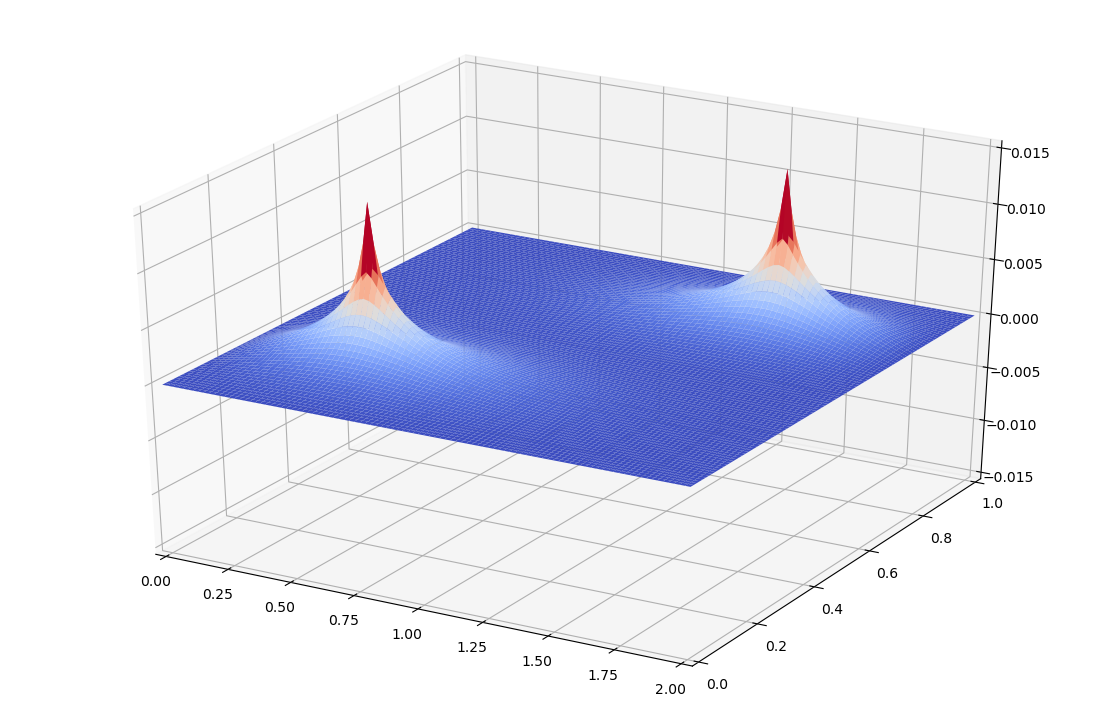

In [5]:
plot2D(x, y, p)

This is the solution after 100 steps (pseudo-time). At this moment all the components from the Navier Stokes equations have been solved by the use of python. All codes may be united to create a 2D finite difference solver. This will actually be used to solve some basic problems of fluid dynamics, the lid driven cavity flow and the viscous flow in the pipe.

# Cavity flow with Navier-Stokes<br>
The momentum equation in vector form for a velocity field $\vec{v}$ is :<br>
<br>
$$\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\nabla)\vec{v}=-\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{v}$$
<br>
This represents three scalar equations, one for each velocity component $(u,v,w)$. But we will solve it in two dime
nsions, so there will be two scalar equations.
<br>
Here is the system of differential equations: two equations for the velocity components $u,v$ and one equation for pressure:<br><br>
$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right)$$
<br>
$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)$$
<br>
$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)$$
<br>
<br>
<b>Discretized equations"<b><br>
    First, let's discretize the $u$-momentum equation as follows:<br>
    <br>
    \begin{split}
& \frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y} = \\ 
& \qquad -\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x}+\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}
    <br>
    <br>
    Similarly for $v$-momentum equation, weget:<br><br>
    \begin{split}
&\frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y}
+\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}<br><br>
    Finally, the discretized pressure-Poission equation can be written as :<br><br>
    \begin{split}
& \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} = \\
& \qquad \rho \left[ \frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) -\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}<br><br>
    Now, we will rearrange these all three equations:<br>
    The momentum equation in the $u$ direction will be: <br>
    <br>
    \begin{split}
u_{i,j}^{n+1} = u_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(u_{i,j}^{n}-u_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(u_{i,j}^{n}-u_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta x} \left(p_{i+1,j}^{n}-p_{i-1,j}^{n}\right) \\
& + \nu \left(\frac{\Delta t}{\Delta x^2} \left(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}\right)\right)
\end{split}
    <br>
    <br>
    The momentum equation in the $v$ direction will be:<br><br>
    \begin{split}
v_{i,j}^{n+1} = v_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(v_{i,j}^{n}-v_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(v_{i,j}^{n}-v_{i,j-1}^{n})\right) \\
& - \frac{\Delta t}{\rho 2\Delta y} \left(p_{i,j+1}^{n}-p_{i,j-1}^{n}\right) \\
& + \nu \left(\frac{\Delta t}{\Delta x^2} \left(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}\right)\right)
\end{split}
    <br><br>
    The pressure-Poission equation will be:<br><br>
    \begin{split}
p_{i,j}^{n} = & \frac{\left(p_{i+1,j}^{n}+p_{i-1,j}^{n}\right) \Delta y^2 + \left(p_{i,j+1}^{n}+p_{i,j-1}^{n}\right) \Delta x^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& -\frac{\rho\Delta x^2\Delta y^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& \times \left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} -2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}-\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
    <br><br>
    The initial condition is $u,v,p=0$ everywhere, and the boundary conditions are:<br><br>
    $u=1$ at $y=2$ <br>
    $u,v=0$ on the other boundaries;<br>
    $\frac{\partial p}{\partial y}=0$ at $y=0$<br>
    $p=0$ at $y=2$ <br>
    $\frac{\partial p}{\partial x}=0$ at $x=0,2$<br>
    
    
    

We will implement all these in python and solve Navier-Stokes equations in 2D, with different boundary conditions. In this section cavity flow will be solved. Specific boundary condition impose a moving wall of 1m/s on the upper side of the square and all other sides are no slip walls with zero velocity and constant pressure.

In [59]:
import numpy as np
import pylab as pl
from pylab import cm
pl.ion()

In [60]:
# Variable declaration
xmin = 0.0
xmax = 2.0
ymin = 0.0
ymax = 2.0
nt = 100
c = 1


In [61]:
# Defining the call function for the problem
def cavityFlow(xmin, xmax, ymin, ymax, nt, c):
    # Number of nodes
    nx = 51
    ny = 51
    
    # Cell size
    dx = (xmax-xmin)/(nx-1)
    dy = (ymax-ymin)/(ny-1)
    
    # Step size
    dt = dx/100
    
    # The grid
    x = np.linspace(xmin,xmax,nx)
    y = np.linspace(ymin,ymax,ny)
    Y, X = np.meshgrid(y,x)
    
    # Fluid properties
    rho = 1
    nu = 0.1
    
    # Matrix initialization
    u = np.zeros((nx, ny))
    v = np.zeros((nx, ny))
    p = np.zeros((nx, ny))
    
    u, v, p = cavitySolver(nt, u, v, dt, dx, dy, p, rho, nu)
    ContourPlot2D(u, v, p, Y, X)

In [62]:
# Defining a function for the pressure build-up
def buildUpB(b, rho, dt, u, v, dx, dy):
    b[1:-1,1:-1] = rho*(1/dt*((u[2:,1:-1]-u[0:-2,1:-1])/(2*dx) + \
    (v[1:-1,2:]-v[1:-1,0:-2])/(2*dy)) - \
    ((u[2:,1:-1]-u[0:-2,1:-1])/(2*dx))**2 - \
    2*((u[1:-1,2:]-u[1:-1,0:-2])/(2*dy))*((v[2:,1:-1]-v[0:-2,1:-1])/(2*dx)) - \
    ((v[1:-1,2:]-v[1:-1,0:-2])/(2*dy))**2)
    
    return b

In [63]:
# Defining the pressure-Poisson solution:
def pressPoisson(p, dx, dy, b):
    pn = np.empty_like(p)
    pn = p.copy()
    nit = 50
    
    for r in range(nit):
        pn = p.copy()
        p[1:-1,1:-1] = 0.5*((pn[2:,1:-1]+pn[0:-2,1:-1])*dy**2 + \
        (pn[1:-1,2:]+pn[1:-1,0:-2])*dx**2)/(dx**2+dy**2) - \
        0.5*(dx*dy)**2/(dx**2+dy**2)*b[1:-1,1:-1]
        
        p[-1,:] = p[-2,:]        # dp/dx = 0 at x = 2
        p[0,:] = p[1,:]          # dp/dx = 0 at x = 0
        p[:,0] = p[:,1]          # dp/dy = 0 at y = 0
        p[:,-1] = 0              # p = 0 at y = 2
    
    return p

In [64]:
# Defining the solver function:
def cavitySolver(nt, u, v, dt, dx, dy, p, rho, nu):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.empty_like(p)
    
    for s in range(nt):
        un = u.copy()
        vn = v.copy()
        
        b = buildUpB(b, rho, dt, u, v, dx, dy)
        p = pressPoisson(p, dx, dy, b)
        
        u[1:-1,1:-1] = un[1:-1,1:-1] - \
        un[1:-1,1:-1]*(dt/dx)*(un[1:-1,1:-1]-un[0:-2,1:-1]) - \
        vn[1:-1,1:-1]*(dt/dy)*(un[1:-1,1:-1]-un[1:-1,0:-2]) - \
        (dt/(2*rho*dx))*(p[2:,1:-1]-p[0:-2,1:-1]) + \
        nu*(dt/dx**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1]) + \
        dt/dy**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2]))
        
        v[1:-1,1:-1] = vn[1:-1,1:-1] - \
        un[1:-1,1:-1]*dt/dx*(vn[1:-1,1:-1]-vn[0:-2,1:-1]) - \
        vn[1:-1,1:-1]*dt/dy*(vn[1:-1,1:-1]-vn[1:-1,0:-2]) - \
        dt/(2*rho*dy)*(p[1:-1,2:]-p[1:-1,0:-2]) + \
        nu*(dt/dx**2*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1]) + \
        dt/dy**2*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2]))
        
        u[0,:] = 0
        u[:,0] = 0
        u[:,-1] = c
        v[0,:] = 0
        v[:,0] = 0
        v[:,-1] = 0
        v[-1,:] = 0
        
    return u, v, p

In [65]:
# Defining the plotting function
def ContourPlot2D(u, v, p, Y, X):
    pl.figure(figsize = (11,7), dpi = 100)
    pl.contourf(X,Y,p,alpha=0.5,cmap=cm.gist_heat)# plotting the pressure field contours
    pl.colorbar()
    pl.quiver(X[::2,::2],Y[::2,::2],u[::2,::2],v[::2,::2]) # plotting velocity vectors
    pl.xlabel('X')
    pl.ylabel('Y')
    pl.title('Pressure contours and velocity vectors')

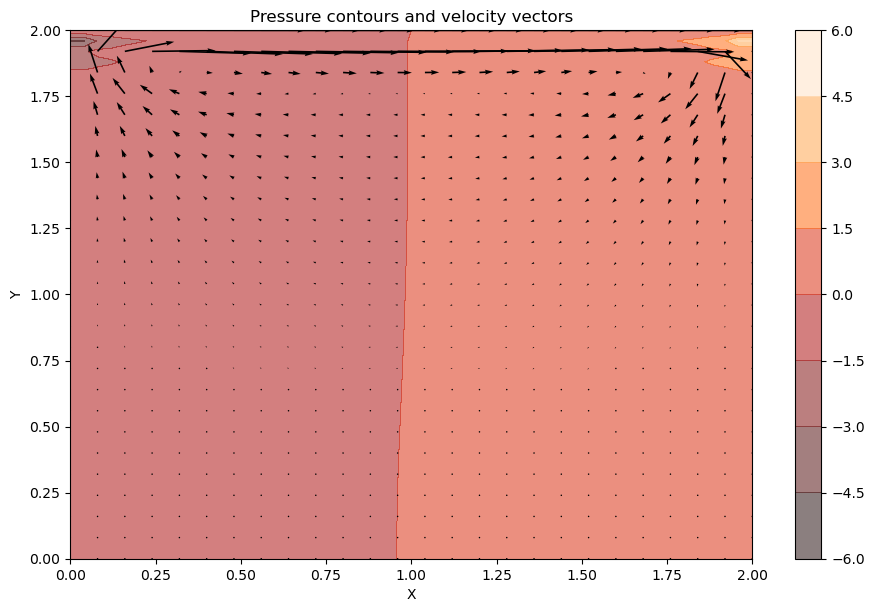

In [13]:
cavityFlow(xmin, xmax, ymin, ymax, nt, c)

Here we started with <b>nt</b> = 100 and we can see that two distinct pressure zones are forming and that the spiral pattern expected form lid-driven cavity is flow is beginning to form. Now we will experiment with different values of <b>nt</b> to see how long the system takes to stablize<br>

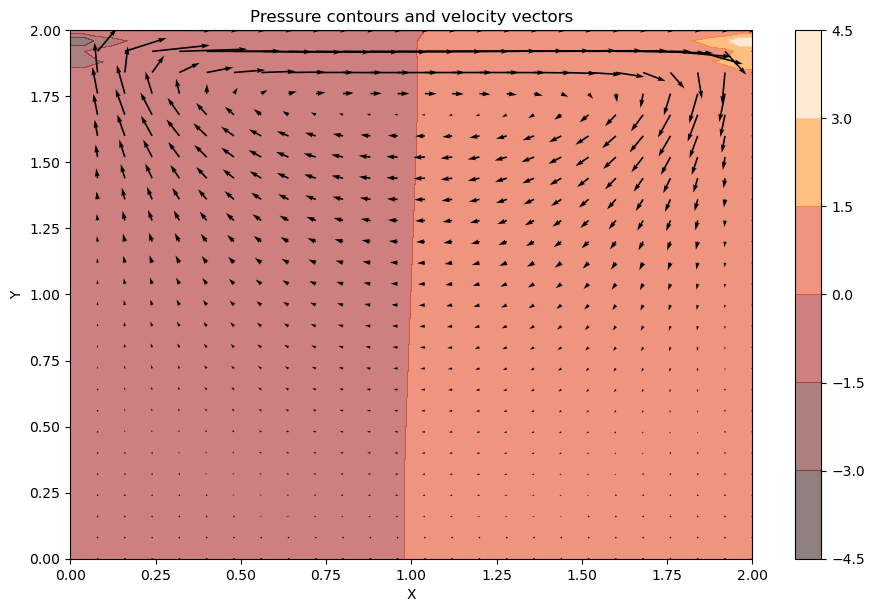

In [14]:
# nt=400
cavityFlow(xmin, xmax, ymin, ymax, 400, c)

 All these mathematics and plotting what we are doing has to deal with the internal recirculating flows generated by the motion of one or more of the containing walls. These flows are not only technologically important, they are of great scientific interest because they display almost all fluid mechanical phenomena in the simplest of geometrical settings. Thus corner eddies, longitudinal vortices, nonuniqueness transition, and turbulence all occur naturally and can be studied in the same closed geometry. This facilitates the comparison of results from experiment, analysis and computation of whole range of Reynolds numbers.